In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [4]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


The datset contains information on 414 housing units aged between 0 and 43.8 years having 1 to 3 bedrooms. The transaction date column has some ambiguity,it is in float datatype, with the first four digits representing the year. Since all the transaction data is between 2012 and 2013, we will only consider the transaction year.

In [5]:
df['Transaction date'] = pd.to_datetime(df['Transaction date'], format = '%Y')

In [6]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012-01-01,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012-01-01,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013-01-01,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013-01-01,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012-01-01,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Exploratory data analysis

### Distribution of target variable

In [7]:
dv = 'House price of unit area' # dependent variable or target variable
#independent_variables
iv = ['House Age', 'Distance from nearest Metro station (km)', 'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)']

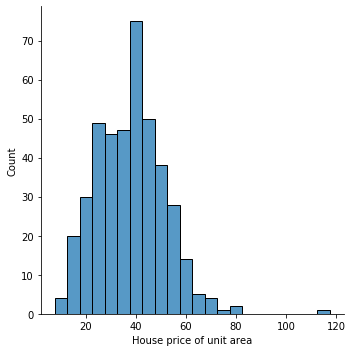

In [8]:
sns.displot(df[dv])

### Relationship between target variable and independent varibles

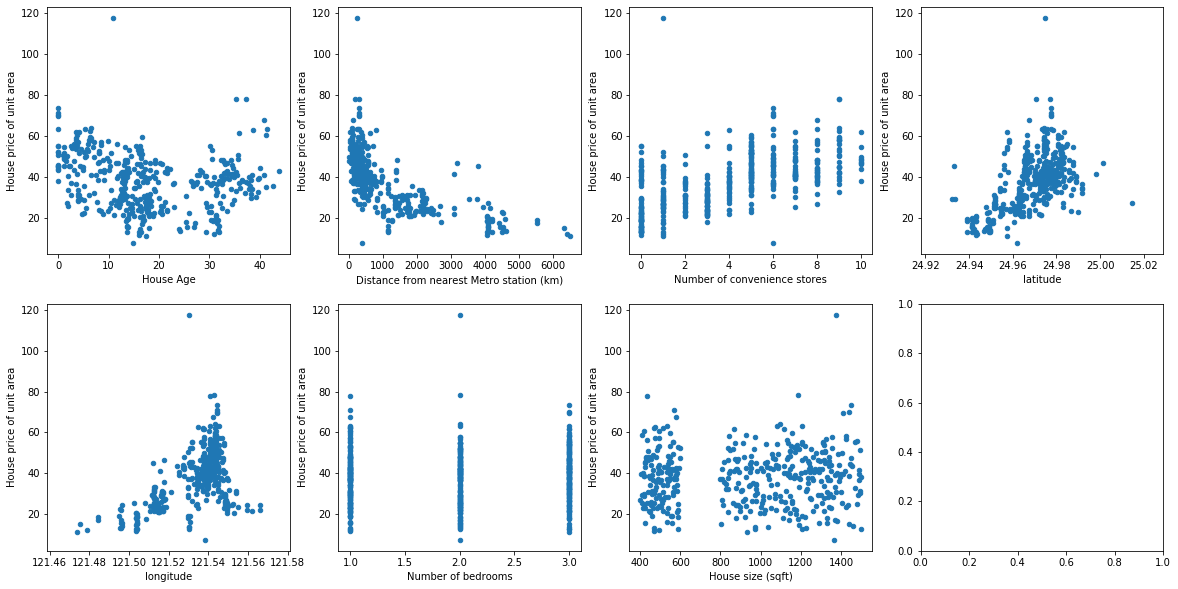

In [9]:
fig, ax = plt.subplots(2,4, figsize = (20,10))

for k,v in enumerate(iv):
    a = df.plot.scatter(x= v, y = dv, ax = ax.flatten()[k])
plt.show()
    

From the scatterplot, it can be inferred that distance from the metro station is an important feature that decides the price per unit area of a house. Also, from the latitude and longitude vs house price per unit area plot, it can be seen that location affects the price. Also there is a slight increse in the price per unit area with increase in the number of convenient stores.


### Effect of location on house price per unit area

<Figure size 1080x1080 with 0 Axes>

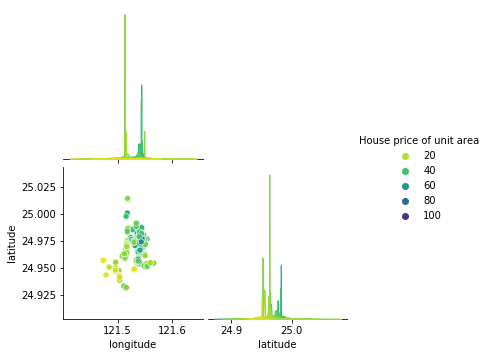

In [10]:
plt.figure(figsize=(15,15))
g = sns.pairplot(data=df[['longitude','latitude','House price of unit area']],
                 hue='House price of unit area', corner=True, palette="viridis_r" )

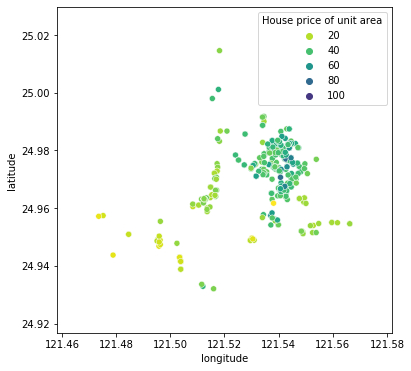

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='longitude', y ='latitude',data=df,  hue="House price of unit area",  palette="viridis_r")

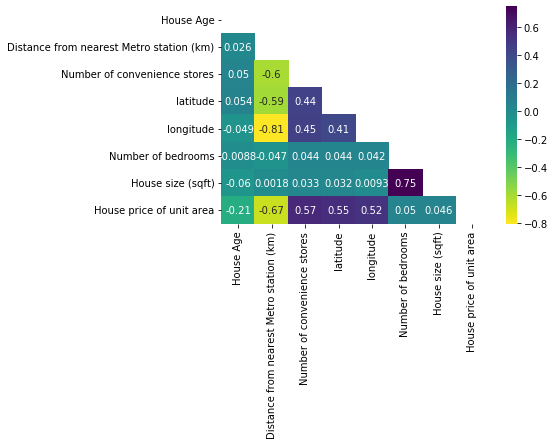

In [12]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="viridis_r", annot=True, mask=mask)

Form heatmap, it can be inferred that House price per unit area is not correlated to Number of bedrooms and House size (sqft) as the correlation coefficient with these variables is close to zero. Logically thinking, this is true as we are dealing with house price *of unit area* and not the actual house price.

## Feature selection

From EDA and correlation heat map, it can be concluded that the distance from the nearest metro station and the number of convenience stores are two key features that are highly correlated to the house price per uni area. Number of bedrooms and House size (sqft) does not affect the House price per unit area. We select the elements which are correlated with the target variable to train the model. 

In [13]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [14]:
selected_features = ['House Age', 'Distance from nearest Metro station (km)', 
                     'Number of convenience stores', 'longitude', 'latitude']

## Data modelling

In [15]:
X = df[selected_features]
y = np.ravel(df['House price of unit area'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Linear regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

In [20]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)
            
print('RMSE:', RMSE)
print('MAE:' ,mae )
print('R2score:', r2score)

RMSE: 8.211727060635344
MAE: 6.144538657498258
R2score: 0.6062457412314606


#### True Value vs. Predicted value for Multiple Linear Regression model

Text(0.5, 1.0, 'Multiple Linear Regression predictions for the test data')

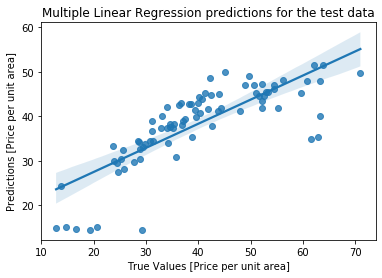

In [21]:
sns.regplot(x=y_test, y=  y_pred)
plt.xlabel('True Values [Price per unit area]')
plt.ylabel('Predictions [Price per unit area]')
plt.title('Multiple Linear Regression predictions for the test data')

### Decision Tree Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor

   max_depth  RMSE   MAE  r2score
0          5  8.43  5.96     0.59
1         10  8.97  6.19     0.53
2         15  8.88  5.88     0.54
3         20  9.03  6.13     0.52
4         25  9.03  6.13     0.52
5         30  9.03  6.13     0.52
6         35  9.03  6.13     0.52
7         40  9.03  6.13     0.52


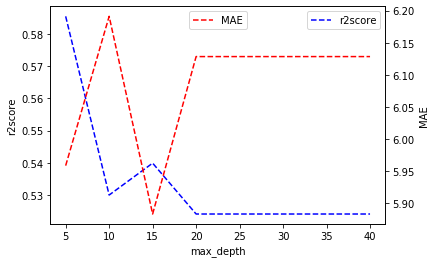

In [23]:
max_depth = [5,10,15,20,25,30,35,40]
RMSE = []
mae = []
r2score = []
for n in max_depth:
    reg = DecisionTreeRegressor(max_depth = n, random_state = 100)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    RMSE.append(sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred)))
    mae.append(mean_absolute_error(y_test, y_pred))
    r2score.append(r2_score(y_test, y_pred))
    
DTRegressor_results = pd.DataFrame({'max_depth':max_depth,'RMSE':RMSE, 'MAE': mae, 'r2score':r2score})

print(DTRegressor_results.round(2))

fig, ax1 = plt.subplots()
ax1.plot(DTRegressor_results['max_depth'], DTRegressor_results['r2score'], 'b--')
ax1.set_xlabel('max_depth')
ax1.set_ylabel('r2score')
ax1.legend(['r2score'], loc ="upper right")
ax2 = ax1.twinx()
ax2.plot(DTRegressor_results['max_depth'], DTRegressor_results['MAE'], 'r--')
ax2.set_ylabel('MAE')
ax2.legend(['MAE'],loc ="upper center") 
plt.show()


The best fitting model in this case has an r2score of 0.67 and MAE of 5.27 with max_depth = 15.

#### True Value vs. Predicted value for the best fitting Decision Tree Regression model

Text(0.5, 1.0, 'Decision Tree Regression predictions for the test data')

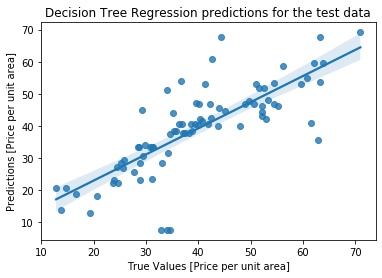

In [24]:
sns.regplot(x=y_test, y=  DecisionTreeRegressor(max_depth = 15, random_state = 100).fit(X_train, y_train).predict(X_test))
plt.xlabel('True Values [Price per unit area]')
plt.ylabel('Predictions [Price per unit area]')
plt.title('Decision Tree Regression predictions for the test data')

## Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

   n_estimators   RMSE    MAE  r2score
0            10  7.226  5.101    0.695
1            20  7.016  4.963    0.713
2            30  6.980  4.929    0.715
3            40  7.022  4.947    0.712
4            50  7.010  4.896    0.713
5            60  6.962  4.836    0.717
6            70  6.906  4.789    0.722
7            80  6.861  4.780    0.725
8            90  6.859  4.769    0.725
9           100  6.879  4.793    0.724


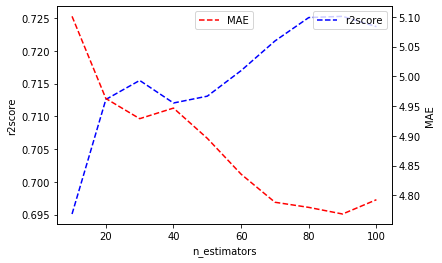

In [26]:
n_estimators = [10,20,30,40,50,60,70,80,90,100]
RMSE = []
mae = []
r2score = []
for n in n_estimators:
    reg = RandomForestRegressor(n_estimators = n, random_state = 100)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    RMSE.append(sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred)))
    mae.append(mean_absolute_error(y_test, y_pred))
    r2score.append(r2_score(y_test, y_pred))
    
RFRegression_results = pd.DataFrame({'n_estimators':n_estimators,'RMSE':RMSE, 'MAE': mae, 'r2score':r2score})

print(RFRegression_results.round(3))

fig, ax1 = plt.subplots()
ax1.plot(RFRegression_results['n_estimators'], RFRegression_results['r2score'], 'b--')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('r2score')
ax1.legend(['r2score'], loc ="upper right")
ax2 = ax1.twinx()
ax2.plot(RFRegression_results['n_estimators'], RFRegression_results['MAE'], 'r--')
ax2.set_ylabel('MAE')
ax2.legend(['MAE'],loc ="upper center") 
plt.show()

The best fitting model in this case has an r2score of 0.724 and  MAE of 4.753 with n_estimators = 80. 

#### True Value vs. Predicted value for the best fitting Random Forest Regression model

Text(0.5, 1.0, 'Random Forest Regression predictions for the test data')

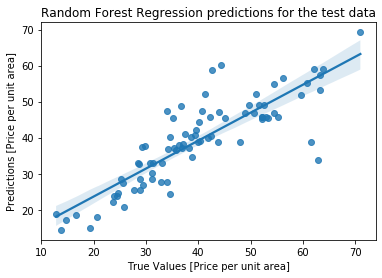

In [27]:
sns.regplot(x=y_test, y= RandomForestRegressor(n_estimators = 80, random_state = 100).fit(X_train, y_train).predict(X_test))
plt.xlabel('True Values [Price per unit area]')
plt.ylabel('Predictions [Price per unit area]')
plt.title('Random Forest Regression predictions for the test data')

## Comparing the different regressor models

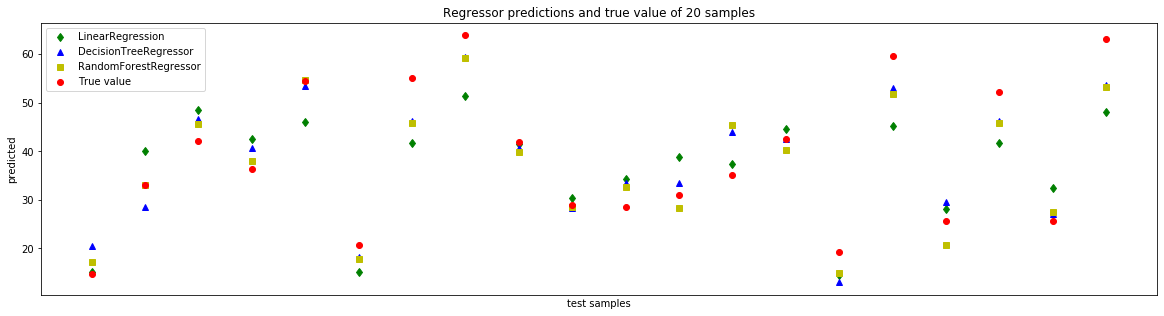

In [28]:
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(max_depth = 15,  random_state = 100)
reg3 = RandomForestRegressor(n_estimators = 80, random_state = 100)

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

pred1 = reg1.predict(X_test[:20])
pred2 = reg2.predict(X_test[:20])
pred3 = reg3.predict(X_test[:20])


plt.figure(figsize=(20,5))
plt.plot(pred1, 'gd', label='LinearRegression')
plt.plot(pred2, 'b^', label='DecisionTreeRegressor')
plt.plot(pred3, 'ys', label='RandomForestRegressor')
plt.plot(y_test[:20], 'ro', label = 'True value')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('test samples')
plt.legend(loc="best")
plt.title('Regressor predictions and true value of 20 samples')

plt.show()

k- fold cross validation was also experimented but did not improve the accuracy score. Random Forest Regressor model has given the highest accuracy with r2score of 0.724. The given dataset was a small  one with ony 414 different transaction details. If the model was trained with a bigger dataset, the accuracy score may have improved. 